In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

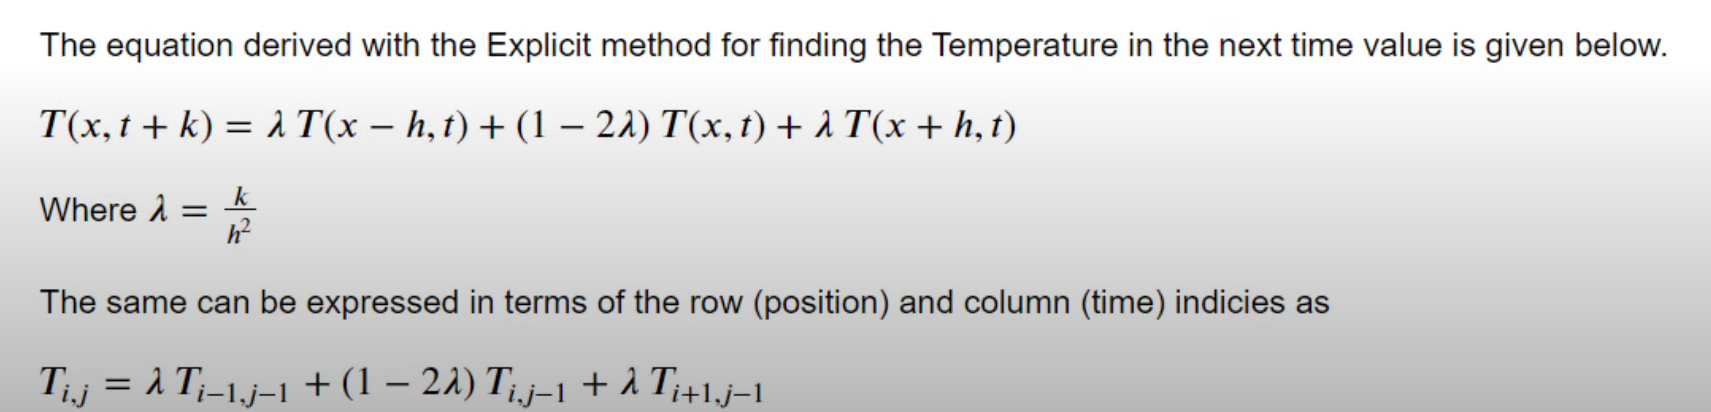

# explicit

In [109]:
h = 0.1
k = 0.001
x = np.arange(0,1+h, h)
t = np.arange(0,0.1+k ,k) 

In [110]:
def heat_solution(f: np.array, x, t, alpha, left_condition: np.array, right_condition: np.array):
    T = np.zeros((len(x),len(t)))
    T[0,:] = left_condition
    T[-1,:] = right_condition
    T[:,0] = f
    for j in range(1, len(t)):
        for i in range(1, len(x) - 1):
            T[i,j] = alpha * T[i-1,j-1] + (1-2 * alpha)*T[i,j-1] + alpha * T[i+1, j-1]
    return T

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


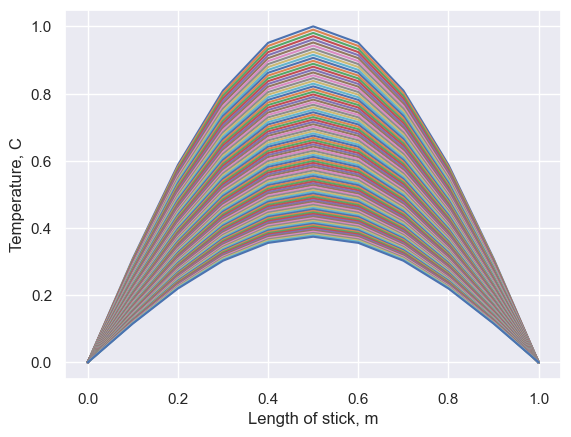

In [113]:
left_condition = np.zeros(len(t))
right_condition = np.zeros(len(t))
print(left_condition)
for i in range(len(t)):
    left_condition[i] = i
    right_condition[i] = i/2
u = heat_solution(np.sin(np.pi * x), x, t, k/h**2, 0, 0)

plt.plot(x, u)
plt.xlabel('Length of stick, m')
plt.ylabel('Temperature, C')
plt.show()

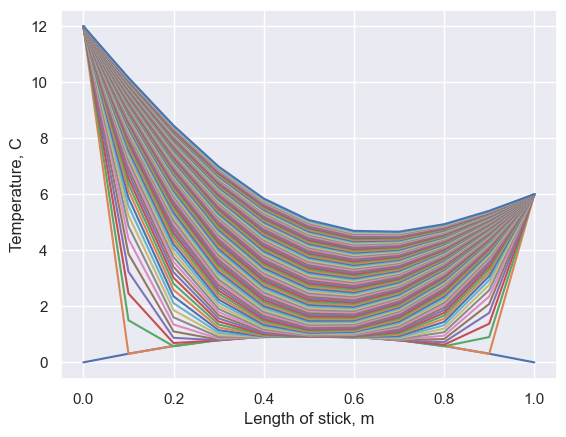

In [114]:
u = heat_solution(np.sin(np.pi * x), x, t, k/h**2, 12, 6)

plt.plot(x, u)
plt.xlabel('Length of stick, m')
plt.ylabel('Temperature, C')
plt.show()

#ну самая нижняя линия видимо общее решение дифура

# implicit
в общем решая систему из двух уравнений используем матрицы, где находим хар. многочлены и оттуда решение

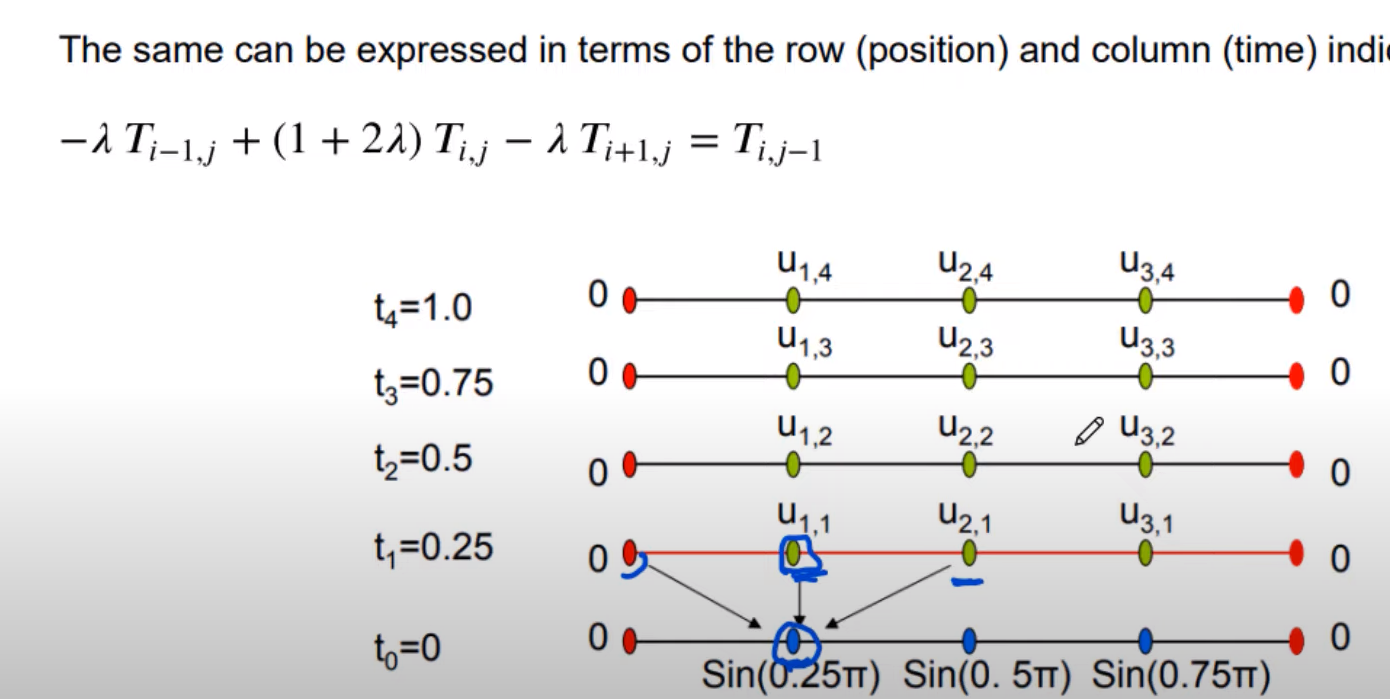

In [103]:
h = 0.25
k = 0.25
x = np.arange(0,1+h, h)
t = np.arange(0,1+k ,k) 
n = len(x)
m = len(t)
T = np.zeros((n,m))
T[0,:] = 0
T[-1,:] = 0
T[:,0] = np.sin(np.pi * x)

factor = 10
A = np.diag([1+2*factor]*3,0) + np.diag([-factor]*2, -1) + np.diag([-factor]*2, 1)
for j in range(1, m):
    b = T[1:-1,j-1].copy()
    b[0] = b[0] + factor * T[0,j]
    b[-1] = b[-1] + factor * T[-1,j]
    solution = np.linalg.solve(A,b)
    T[1:-1, j] = solution

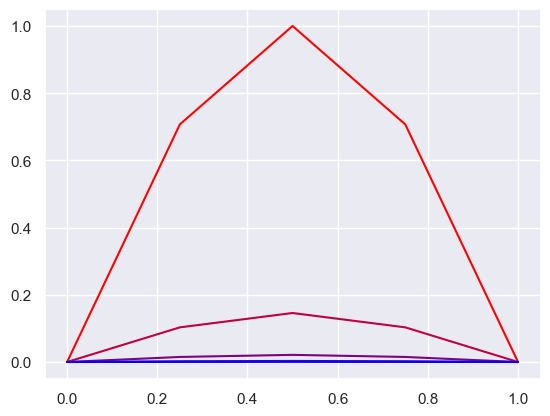

In [104]:
R = np.linspace(1,0,m)
B = np.linspace(0,1,m)
G = 0
for j in range(m):
    plt.plot(x, T[:,j], color=[R[j],G, B[j]])

In [105]:
def impl_heat_equation(length, dx, sigma, t, dt, f):
    delta_x = int(length / dx) - 1
    delta_t = int(t / dt) - 1
    solution = np.zeros((delta_t + 1, delta_x + 1))
    for i in range(delta_x + 1):
        solution[0][i] = f(i * delta_x)
    alpha = np.zeros(delta_x)
    beta = np.zeros(delta_x)
    for ti in range(delta_t):
        alpha[0] = 0
        beta[0] = (dt * (ti + 1))
        for x in range(1, delta_x):
            a = -sigma * dt / (delta_x ** 2)
            b = 1 + 2 * sigma * dt / (delta_x ** 2)
            alpha[x] = -a / (b + a * alpha[x - 1])
            beta[x] = (solution[ti][x] - a * beta[x - 1]) / (b + a * alpha[x - 1])
        solution[ti + 1][delta_x] = (dt * (ti + 1))
        for x in range(delta_x, 0, -1):
            solution[ti + 1][x - 1] = alpha[x - 1] * solution[ti + 1][x] + beta[x - 1]
    return solution

In [106]:
from matplotlib import colors as c

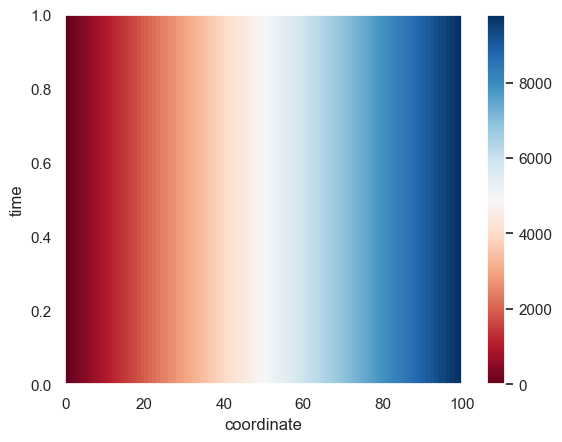

In [107]:
sol = impl_heat_equation(1, 0.01, 2, 1, 1, lambda x: x)
cMap = plt.get_cmap('RdBu')
plt.pcolormesh(sol, cmap=cMap)
plt.xlabel('coordinate')
plt.colorbar()
plt.ylabel('time')
plt.show()